In [37]:
# Import packages
import pandas as pd 
import numpy as np
from sklearn import preprocessing

In [3]:
# Import data
train_data = pd.read_csv("data/train_values.csv")
train_labels = pd.read_csv("data/train_labels.csv")
test_values = pd.read_csv("data/test_values.csv")

In [32]:
# Preview training data
train_data.head(10)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
5,ldukkw,1,normal,130,3,0,0,0,180,0.0,1,42,150,0
6,2gbyh9,2,reversible_defect,150,4,2,0,2,258,2.6,0,60,157,0
7,daa9kp,2,fixed_defect,150,4,1,0,2,276,0.6,1,57,112,1
8,3nwy2n,3,reversible_defect,170,4,0,0,2,326,3.4,1,59,140,1
9,1r508r,2,normal,120,3,0,0,0,219,1.6,0,50,158,0


In [57]:
train_data.tail(10)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
170,qhz9ye,1,reversible_defect,150,4,0,0,2,270,0.8,1,58,111,1
171,u25507,1,normal,112,4,1,0,2,212,0.1,1,66,132,1
172,j9tw19,2,reversible_defect,118,4,0,0,0,219,1.2,1,39,140,0
173,5o32oi,1,reversible_defect,140,4,0,0,0,299,1.6,1,51,173,1
174,o63ri2,1,normal,140,4,0,0,0,239,1.2,1,54,160,0
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0


In [11]:
# Generate descriptive statistics for training data - no missing data
train_data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [60]:
# Check missing data
np.sum(train_data.isna())

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

In [25]:
# Check data balance (proportion of cases with heart disease)
prop_heart = np.sum(train_labels['heart_disease_present'])/len(train_labels)*100
prop_heart

44.44444444444444

In [47]:
# Get subset of numerical data
numerical_train_data=train_data[['slope_of_peak_exercise_st_segment','resting_blood_pressure','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','age','max_heart_rate_achieved','exercise_induced_angina']]

In [49]:
# Normalize numerical data
normalized_num_data=(numerical_train_data-numerical_train_data.mean())/numerical_train_data.std()

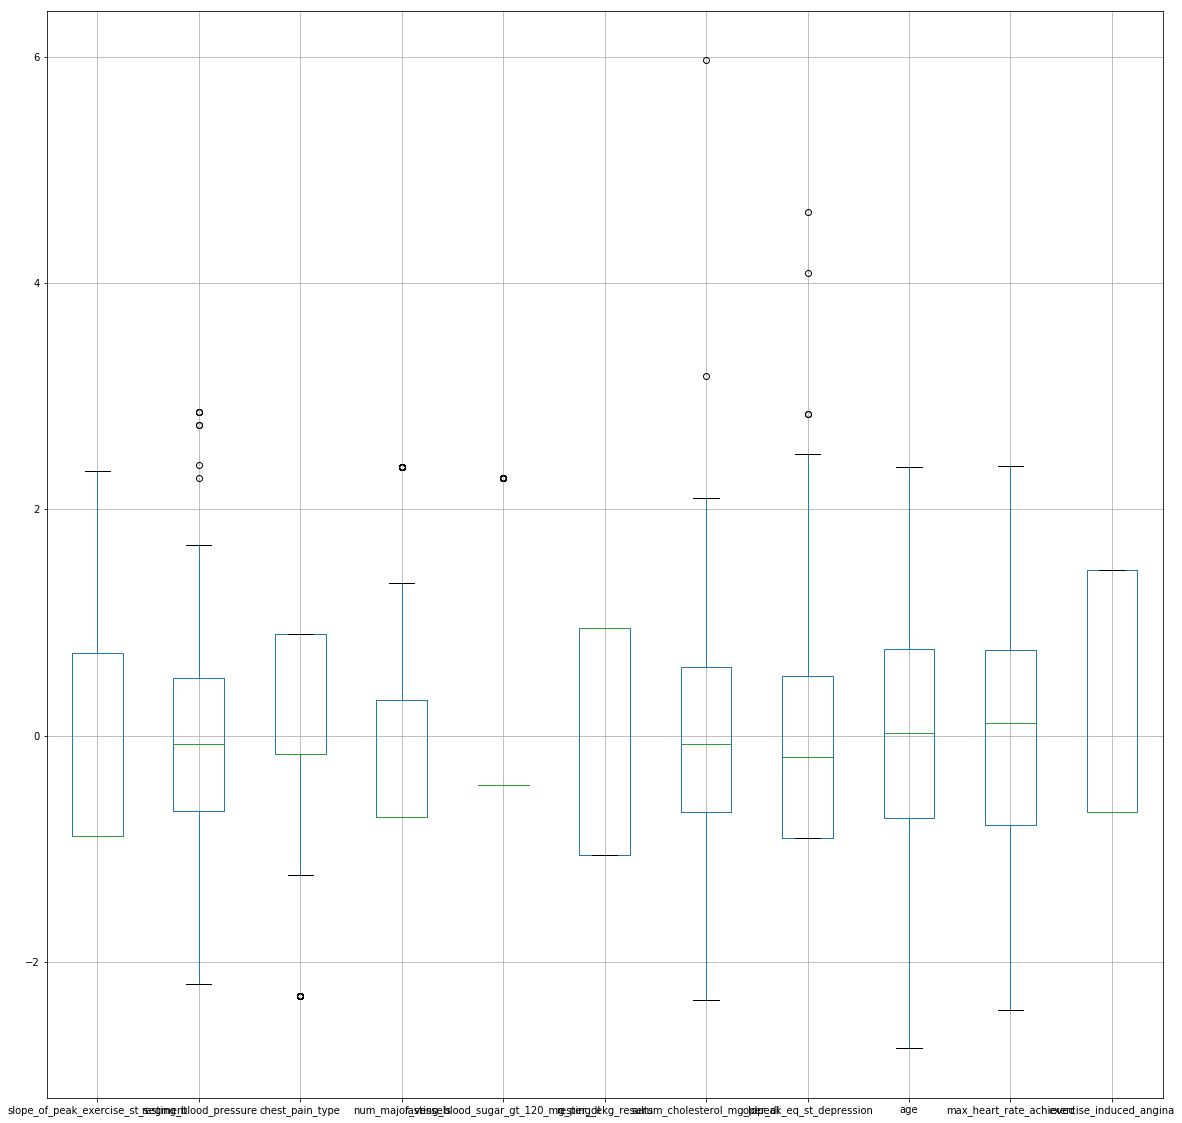

In [52]:
# Boxplots
normalized_num_data.boxplot(figsize=(20,20))